# Plantaris Data - Data analysis from data sensors collection.

##### The data from the sensors DHT22 (temperature and relative humidity) and soil moisture was collected and save it in a .CSV file.

### Import libraries 

In [107]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [108]:
# Read dataset
df = pd.read_csv('temp_hum_processed.csv', index_col=False, sep=";", encoding="utf-8")

### Explore the dataset

In [100]:
print("Random sample:" )
print(df.sample(10))

Random sample:
        date measurement  celsius  humidity  moisture
590  2020-09-08_06:18:00     25.5      49.4       713
442  2020-09-06_04:57:31     26.0      36.3       640
902  2020-09-12_14:19:02     27.3      52.8       710
285  2020-09-04_00:37:00     26.1      73.5       668
309  2020-09-04_08:37:05     25.9      70.4       718
202  2020-09-01_02:59:57     24.3      45.1       740
782  2020-09-10_22:18:38     27.0      55.9       722
448  2020-09-06_06:57:32     25.9      64.3       674
576  2020-09-08_01:37:58     26.1      51.3       680
249  2020-09-02_02:30:10     24.8      70.0       821



In [101]:
# Use the describe method to see how the data is distributed
data_info = df.describe()
print(data_info)

          celsius    humidity    moisture
count  959.000000  959.000000  959.000000
mean    25.876225   58.970699  707.221064
std      1.142872   10.831072   35.192568
min     22.300000   33.800000  635.000000
25%     25.000000   50.600000  681.000000
50%     26.000000   58.800000  705.000000
75%     26.700000   69.350000  717.000000
max     29.900000   79.800000  887.000000


In [106]:
# To explore the first values from our data 
print("Temperature in celsius (°C):" )
temperature = df["celsius"].copy()
print(temperature.head())

print("Relative humidity (%):" )
humidity = df["humidity"].copy()
print(humidity.head())

print("Soil moisture:" )
moisture = df["moisture"].copy()
print(moisture.head())

Temperature in celsius (°C):
0    25.1
1    25.2
2    25.1
3    24.9
4    24.9
Name: celsius, dtype: float64
Relative humidity (%):
0    53.1
1    56.6
2    59.2
3    53.6
4    51.1
Name: humidity, dtype: float64
Soil moisture:
0    674
1    675
2    710
3    693
4    700
Name: moisture, dtype: int64


## Temperature and humidity visualization

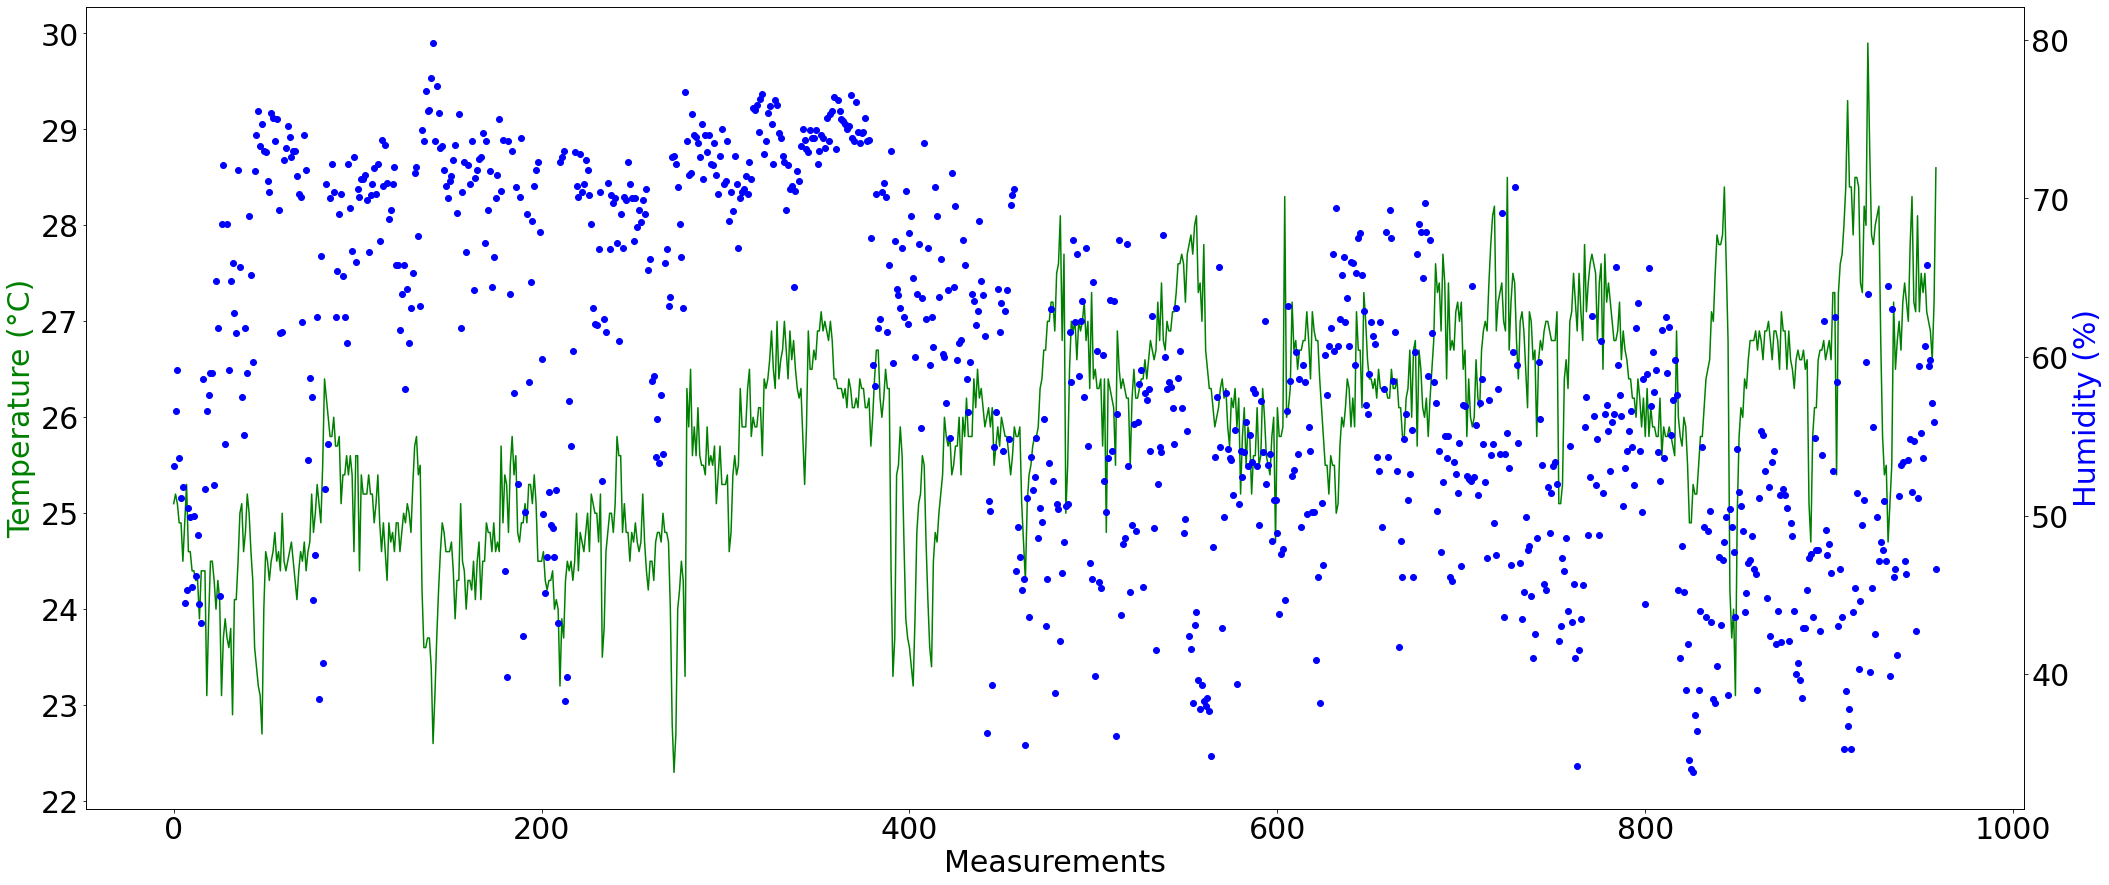

In [103]:
# Set figure size with matplotlib
plt.rcParams["figure.figsize"] = (30,13)
plt.rcParams.update({'font.size': 30})

fig,ax1 = plt.subplots()

ax1.plot(temperature, 'g')
ax1.set_xlabel('Measurements')

ax1.set_ylabel('Temperature (°C)', color='g')
ax1.tick_params('y')
ax2 = ax1.twinx()

ax2.plot(humidity, 'bo')
ax2.set_xlabel('days')
ax2.set_ylabel('Humidity (%)', color='b')
ax2.tick_params('y')
fig.tight_layout()
plt.show()

## Temperature and soil moisture visualization

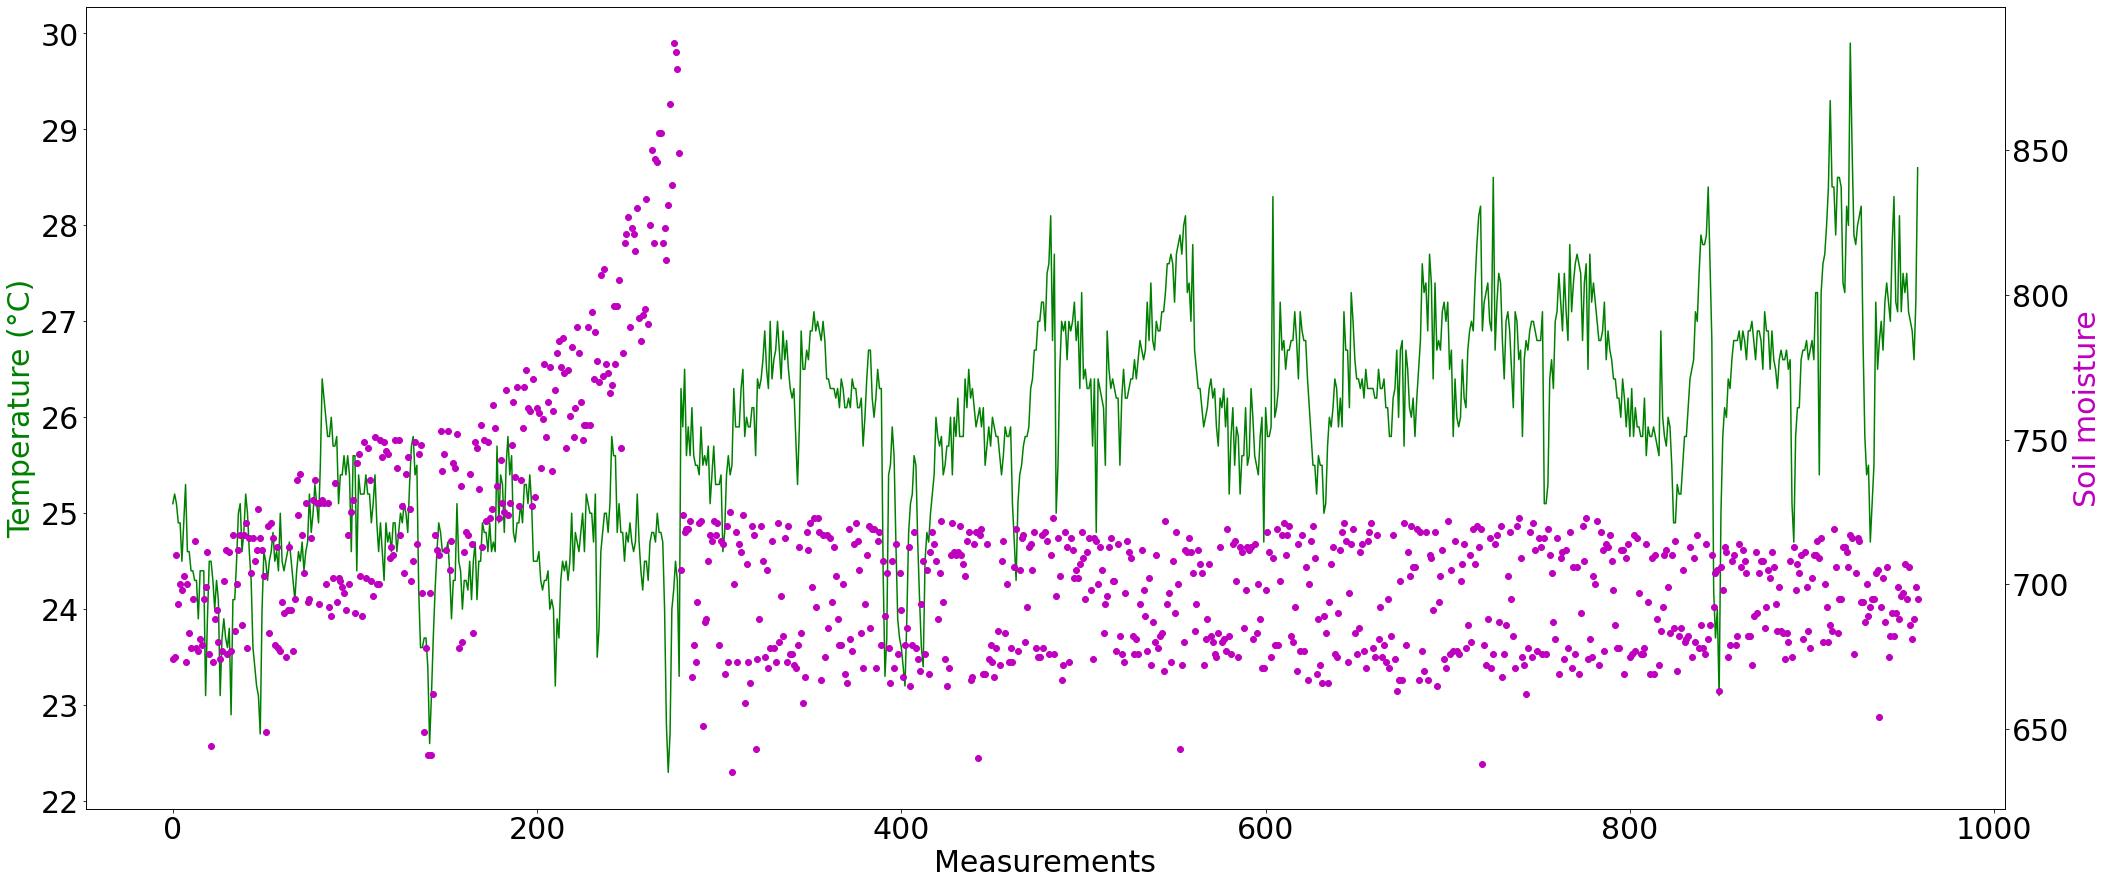

In [104]:
fig, ax1 = plt.subplots()

ax1.plot(temperature,'g')
ax1.set_xlabel('Measurements')

ax1.set_ylabel('Temperature (°C)', color='g')
ax1.tick_params('y')
ax2 = ax1.twinx()

ax2.plot(moisture, 'mo')
ax2.set_xlabel('days')
ax2.set_ylabel('Soil moisture', color='m')
ax2.tick_params('y')
fig.tight_layout()
plt.show()

## Is there a correlation between variables?

           celsius  humidity  moisture
celsius   1.000000 -0.407608 -0.352600
humidity -0.407608  1.000000  0.207604
moisture -0.352600  0.207604  1.000000


<AxesSubplot:>

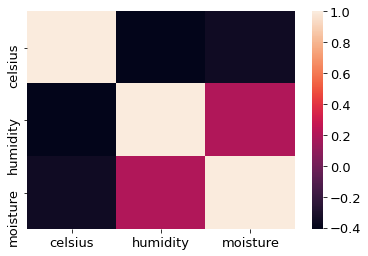

In [105]:
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams.update({'font.size': 13})

# Calculate correlations
corr = df.corr()
print(corr)
 
# Heatmap
sns.heatmap(corr)